<a href="https://colab.research.google.com/github/bunnyband/Data-Science/blob/main/Personal_Consumtion_Expenditures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries and Data Set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
import datetime 
import datetime as dt


drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
filename = ('/content/drive/MyDrive/Personal Consumption Expenditures.xlsx')

df= pd.read_excel(filename)

df

,Category,Sub-Category,Month,Millions of Dollars
0,Alcoholic beverages,Beer,1976-01-01,9908
1,Alcoholic beverages,Beer,1976-02-01,9994
2,Alcoholic beverages,Beer,1976-03-01,10127
3,Alcoholic beverages,Beer,1976-04-01,10204
4,Alcoholic beverages,Beer,1976-05-01,10233
...,...,...,...,...
14895,"Coffee, tea, and other beverage materials","Coffee, tea, and other beverage materials",2021-01-01,18768
14896,"Mineral waters, soft drinks, and vegetable juices","Mineral waters, soft drinks, and vegetable juices",2021-01-01,93320
14897,Alcoholic beverages,Spirits,2021-01-01,39325
14898,Alcoholic beverages,Wine,2021-01-01,54832


In [14]:
df = df.rename(columns={"Sub-Category":"Subcategory"})

df

,Category,Subcategory,Month,Millions of Dollars
0,Alcoholic beverages,Beer,1976-01-01,9908
1,Alcoholic beverages,Beer,1976-02-01,9994
2,Alcoholic beverages,Beer,1976-03-01,10127
3,Alcoholic beverages,Beer,1976-04-01,10204
4,Alcoholic beverages,Beer,1976-05-01,10233
...,...,...,...,...
14895,"Coffee, tea, and other beverage materials","Coffee, tea, and other beverage materials",2021-01-01,18768
14896,"Mineral waters, soft drinks, and vegetable juices","Mineral waters, soft drinks, and vegetable juices",2021-01-01,93320
14897,Alcoholic beverages,Spirits,2021-01-01,39325
14898,Alcoholic beverages,Wine,2021-01-01,54832


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Category             14900 non-null  object        
 1   Sub-Category         14900 non-null  object        
 2   Month                14900 non-null  datetime64[ns]
 3   Millions of Dollars  14900 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 465.8+ KB


In [5]:
# Check for duplicate data

df.duplicated().sum()

0

### Determine Values in Each Column

In [6]:
df['Category'].value_counts()

Meats and poultry                                    2980
Alcoholic beverages                                  2235
Milk, dairy products, and eggs                       2235
Cereals and bakery products                          1490
Fresh fruits and vegetables                          1490
Fats and oils                                         745
Fish and seafood                                      745
Processed fruits and vegetables                       745
Sugar and sweets                                      745
Coffee, tea, and other beverage materials             745
Mineral waters, soft drinks, and vegetable juices     745
Name: Category, dtype: int64

In [7]:
df['Sub-Category'].value_counts()

Beer                                                 745
Spirits                                              745
Coffee, tea, and other beverage materials            745
Sugar and sweets                                     745
Processed fruits and vegetables                      745
Processed dairy products                             745
Fresh milk                                           745
Eggs                                                 745
Poultry                                              745
Pork                                                 745
Other meats                                          745
Beef and veal                                        745
Vegetables (fresh)                                   745
Fruit (fresh)                                        745
Fish and seafood                                     745
Fats and oils                                        745
Cereals                                              745
Bakery products                

In [8]:
df['Month'].value_counts()

1976-01-01    20
2000-09-01    20
1999-12-01    20
2000-01-01    20
2000-02-01    20
              ..
1964-12-01    20
1965-01-01    20
1965-02-01    20
1965-03-01    20
2021-01-01    20
Name: Month, Length: 745, dtype: int64

### Check for Missing Data

In [9]:
# Check for missing data

df.isnull().sum()

Category               0
Sub-Category           0
Month                  0
Millions of Dollars    0
dtype: int64

### Filter by Alcoholic Beverages

In [151]:
AB = df['Category'] == 'Alcoholic beverages'

AB = df.loc[AB,: ]

AB = AB.sort_values(by="Month")

AB

,Category,Subcategory,Month,Millions of Dollars
3804,Alcoholic beverages,Spirits,1959-01-01,2343
4008,Alcoholic beverages,Wine,1959-01-01,544
3600,Alcoholic beverages,Beer,1959-01-01,3457
3805,Alcoholic beverages,Spirits,1959-02-01,2329
4009,Alcoholic beverages,Wine,1959-02-01,539
...,...,...,...,...
14877,Alcoholic beverages,Spirits,2020-12-01,37987
14879,Alcoholic beverages,Beer,2020-12-01,76988
14898,Alcoholic beverages,Wine,2021-01-01,54832
14897,Alcoholic beverages,Spirits,2021-01-01,39325


In [152]:
AB.value_counts('Subcategory')

Subcategory
Beer       745
Spirits    745
Wine       745
dtype: int64

In [180]:
AB1 = AB.groupby(['Month'], as_index = False)[['Millions of Dollars']].sum()

AB1

,Month,Millions of Dollars
0,1959-01-01,6344
1,1959-02-01,6285
2,1959-03-01,6264
3,1959-04-01,6112
4,1959-05-01,6327
...,...,...
740,2020-09-01,172005
741,2020-10-01,169581
742,2020-11-01,171379
743,2020-12-01,167915


#### Subfilter of Alcoholic Beverages

In [43]:
BeerFilter = df['Subcategory'] == 'Beer'

BeerFilter = df.loc[BeerFilter,: ]

BeerFilter = BeerFilter.sort_values(by="Month")

BeerFilter

,Category,Subcategory,Month,Millions of Dollars
3600,Alcoholic beverages,Beer,1959-01-01,3457
3601,Alcoholic beverages,Beer,1959-02-01,3417
3602,Alcoholic beverages,Beer,1959-03-01,3401
3603,Alcoholic beverages,Beer,1959-04-01,3316
3604,Alcoholic beverages,Beer,1959-05-01,3434
...,...,...,...,...
14819,Alcoholic beverages,Beer,2020-09-01,78580
14839,Alcoholic beverages,Beer,2020-10-01,77572
14859,Alcoholic beverages,Beer,2020-11-01,78407
14879,Alcoholic beverages,Beer,2020-12-01,76988


In [44]:
SpiritFilter = df['Subcategory'] == 'Spirits'

SpiritFilter = df.loc[SpiritFilter,: ]

SpiritFilter = SpiritFilter.sort_values(by="Month")

SpiritFilter

,Category,Subcategory,Month,Millions of Dollars
3804,Alcoholic beverages,Spirits,1959-01-01,2343
3805,Alcoholic beverages,Spirits,1959-02-01,2329
3806,Alcoholic beverages,Spirits,1959-03-01,2326
3807,Alcoholic beverages,Spirits,1959-04-01,2272
3808,Alcoholic beverages,Spirits,1959-05-01,2350
...,...,...,...,...
14817,Alcoholic beverages,Spirits,2020-09-01,39164
14837,Alcoholic beverages,Spirits,2020-10-01,38514
14857,Alcoholic beverages,Spirits,2020-11-01,38893
14877,Alcoholic beverages,Spirits,2020-12-01,37987


In [75]:
WineFilter = df['Subcategory'] == 'Wine'

WineFilter = df.loc[WineFilter,: ]

WineFilter = WineFilter.sort_values(by="Month")

WineFilter

,Category,Subcategory,Month,Millions of Dollars
4008,Alcoholic beverages,Wine,1959-01-01,544
4009,Alcoholic beverages,Wine,1959-02-01,539
4010,Alcoholic beverages,Wine,1959-03-01,537
4011,Alcoholic beverages,Wine,1959-04-01,524
4012,Alcoholic beverages,Wine,1959-05-01,543
...,...,...,...,...
14818,Alcoholic beverages,Wine,2020-09-01,54261
14838,Alcoholic beverages,Wine,2020-10-01,53495
14858,Alcoholic beverages,Wine,2020-11-01,54079
14878,Alcoholic beverages,Wine,2020-12-01,52940


#### Visualization of Alcoholic Beverages

(0.0, 86601.95)

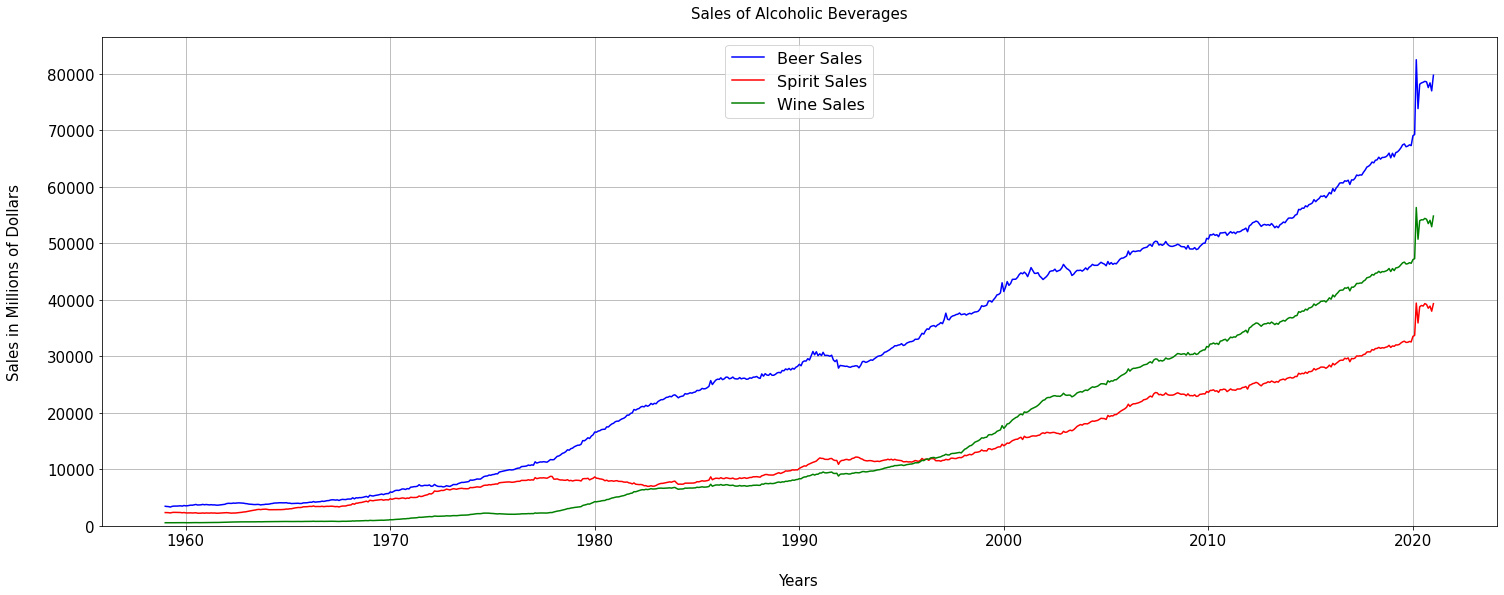

In [77]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(25, 9) )

plt.plot(BeerFilter['Month'], BeerFilter['Millions of Dollars'], c = 'b', label = 'Beer Sales');
plt.plot(SpiritFilter['Month'], SpiritFilter['Millions of Dollars'], c = 'red', label = 'Spirit Sales');
plt.plot(WineFilter['Month'], WineFilter['Millions of Dollars'], c = 'green', label = 'Wine Sales');

plt.grid()
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Sales of Alcoholic Beverages', fontsize = 15, y= 1.025)
plt.xlabel('Years', fontsize = 15, labelpad = 25)
plt.ylabel('Sales in Millions of Dollars', fontsize = 15, labelpad = 25)
plt.legend(loc="upper center", fontsize = 16)
plt.ylim(bottom=0)

### Filter By Meats and Poultry

In [78]:
MP = df['Category'] == 'Meats and poultry'

MP = df.loc[MP,: ]

MP = MP.sort_values(by="Month")

MP

,Category,Subcategory,Month,Millions of Dollars
5844,Meats and poultry,Pork,1959-01-01,2598
5640,Meats and poultry,Other meats,1959-01-01,2155
5436,Meats and poultry,Beef and veal,1959-01-01,7462
6048,Meats and poultry,Poultry,1959-01-01,1699
5437,Meats and poultry,Beef and veal,1959-02-01,7410
...,...,...,...,...
14865,Meats and poultry,Poultry,2020-12-01,62675
14884,Meats and poultry,Other meats,2021-01-01,40027
14882,Meats and poultry,Beef and veal,2021-01-01,54944
14883,Meats and poultry,Pork,2021-01-01,40087


In [80]:
MP.value_counts('Subcategory')

Subcategory
Beef and veal    745
Other meats      745
Pork             745
Poultry          745
dtype: int64

In [183]:
MP1 = MP.groupby(['Month'], as_index = False)[['Millions of Dollars']].sum()

MP1

,Month,Millions of Dollars
0,1959-01-01,13914
1,1959-02-01,13801
2,1959-03-01,13573
3,1959-04-01,13583
4,1959-05-01,13838
...,...,...
740,2020-09-01,195933
741,2020-10-01,194484
742,2020-11-01,197046
743,2020-12-01,192835


#### Subfilters of Meats and Poultry

In [82]:
BeefFilter = df['Subcategory'] == 'Beef and veal'

BeefFilter = df.loc[BeefFilter,: ]

BeefFilter = BeefFilter.sort_values(by="Month")

BeefFilter

,Category,Subcategory,Month,Millions of Dollars
5436,Meats and poultry,Beef and veal,1959-01-01,7462
5437,Meats and poultry,Beef and veal,1959-02-01,7410
5438,Meats and poultry,Beef and veal,1959-03-01,7293
5439,Meats and poultry,Beef and veal,1959-04-01,7301
5440,Meats and poultry,Beef and veal,1959-05-01,7436
...,...,...,...,...
14802,Meats and poultry,Beef and veal,2020-09-01,53816
14822,Meats and poultry,Beef and veal,2020-10-01,53415
14842,Meats and poultry,Beef and veal,2020-11-01,54116
14862,Meats and poultry,Beef and veal,2020-12-01,52952


In [84]:
PorkFilter = df['Subcategory'] == 'Pork'

PorkFilter = df.loc[PorkFilter,: ]

PorkFilter = PorkFilter.sort_values(by="Month")

PorkFilter

,Category,Subcategory,Month,Millions of Dollars
5844,Meats and poultry,Pork,1959-01-01,2598
5845,Meats and poultry,Pork,1959-02-01,2581
5846,Meats and poultry,Pork,1959-03-01,2540
5847,Meats and poultry,Pork,1959-04-01,2542
5848,Meats and poultry,Pork,1959-05-01,2590
...,...,...,...,...
14803,Meats and poultry,Pork,2020-09-01,39264
14823,Meats and poultry,Pork,2020-10-01,38971
14843,Meats and poultry,Pork,2020-11-01,39483
14863,Meats and poultry,Pork,2020-12-01,38634


In [85]:
PoultryFilter = df['Subcategory'] == 'Poultry'

PoultryFilter = df.loc[PoultryFilter,: ]

PoultryFilter = PoultryFilter.sort_values(by="Month")

PoultryFilter

,Category,Subcategory,Month,Millions of Dollars
6048,Meats and poultry,Poultry,1959-01-01,1699
6049,Meats and poultry,Poultry,1959-02-01,1677
6050,Meats and poultry,Poultry,1959-03-01,1645
6051,Meats and poultry,Poultry,1959-04-01,1644
6052,Meats and poultry,Poultry,1959-05-01,1676
...,...,...,...,...
14805,Meats and poultry,Poultry,2020-09-01,63697
14825,Meats and poultry,Poultry,2020-10-01,63222
14845,Meats and poultry,Poultry,2020-11-01,64052
14865,Meats and poultry,Poultry,2020-12-01,62675


In [86]:
OtherMeatFilter = df['Subcategory'] == 'Other meats'

OtherMeatFilter = df.loc[OtherMeatFilter,: ]

OtherMeatFilter = OtherMeatFilter.sort_values(by="Month")

OtherMeatFilter

,Category,Subcategory,Month,Millions of Dollars
5640,Meats and poultry,Other meats,1959-01-01,2155
5641,Meats and poultry,Other meats,1959-02-01,2133
5642,Meats and poultry,Other meats,1959-03-01,2095
5643,Meats and poultry,Other meats,1959-04-01,2096
5644,Meats and poultry,Other meats,1959-05-01,2136
...,...,...,...,...
14804,Meats and poultry,Other meats,2020-09-01,39156
14824,Meats and poultry,Other meats,2020-10-01,38876
14844,Meats and poultry,Other meats,2020-11-01,39395
14864,Meats and poultry,Other meats,2020-12-01,38574


#### Visualization of Meats and Poultry

(0.0, 75625.95)

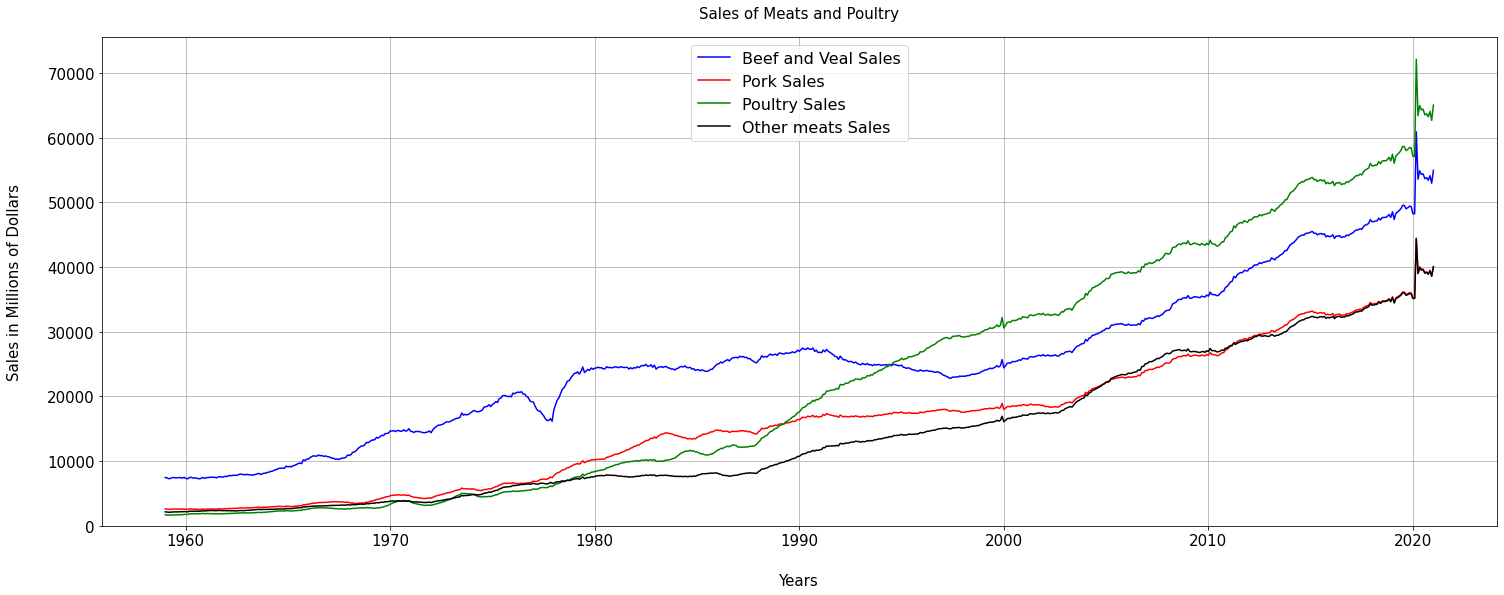

In [92]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(25, 9) )

plt.plot(BeefFilter['Month'], BeefFilter['Millions of Dollars'], c = 'blue', label = 'Beef and Veal Sales');
plt.plot(PorkFilter['Month'], PorkFilter['Millions of Dollars'], c = 'red', label = 'Pork Sales');
plt.plot(PoultryFilter['Month'], PoultryFilter['Millions of Dollars'], c = 'green', label = 'Poultry Sales');
plt.plot(OtherMeatFilter['Month'], OtherMeatFilter['Millions of Dollars'], c = 'black', label = 'Other meats Sales');

plt.grid()
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Sales of Meats and Poultry', fontsize = 15, y= 1.025)
plt.xlabel('Years', fontsize = 15, labelpad = 25)
plt.ylabel('Sales in Millions of Dollars', fontsize = 15, labelpad = 25)
plt.legend(loc="upper center", fontsize = 16)
plt.ylim(bottom=0)

### Filter by Milk Products

In [93]:
Dairy = df['Category'] == 'Milk, dairy products, and eggs'

Dairy = df.loc[Dairy,: ]

Dairy = Dairy.sort_values(by="Month")

Dairy

,Category,Subcategory,Month,Millions of Dollars
6456,"Milk, dairy products, and eggs",Fresh milk,1959-01-01,6085
6660,"Milk, dairy products, and eggs",Processed dairy products,1959-01-01,3165
6252,"Milk, dairy products, and eggs",Eggs,1959-01-01,1193
6457,"Milk, dairy products, and eggs",Fresh milk,1959-02-01,6052
6661,"Milk, dairy products, and eggs",Processed dairy products,1959-02-01,3151
...,...,...,...,...
14867,"Milk, dairy products, and eggs",Fresh milk,2020-12-01,27291
14869,"Milk, dairy products, and eggs",Eggs,2020-12-01,14257
14888,"Milk, dairy products, and eggs",Processed dairy products,2021-01-01,58431
14887,"Milk, dairy products, and eggs",Fresh milk,2021-01-01,28316


In [94]:
Dairy.value_counts('Subcategory')

Subcategory
Eggs                        745
Fresh milk                  745
Processed dairy products    745
dtype: int64

In [184]:
Dairy1 = Dairy.groupby(['Month'], as_index = False)[['Millions of Dollars']].sum()

Dairy1

,Month,Millions of Dollars
0,1959-01-01,10443
1,1959-02-01,10385
2,1959-03-01,10227
3,1959-04-01,10239
4,1959-05-01,10429
...,...,...
740,2020-09-01,99096
741,2020-10-01,98524
742,2020-11-01,99724
743,2020-12-01,97847


#### Subfilters of Milk Products

In [95]:
EggFilter = df['Subcategory'] == 'Eggs'

EggFilter = df.loc[EggFilter,: ]

EggFilter = EggFilter.sort_values(by="Month")

EggFilter

,Category,Subcategory,Month,Millions of Dollars
6252,"Milk, dairy products, and eggs",Eggs,1959-01-01,1193
6253,"Milk, dairy products, and eggs",Eggs,1959-02-01,1182
6254,"Milk, dairy products, and eggs",Eggs,1959-03-01,1161
6255,"Milk, dairy products, and eggs",Eggs,1959-04-01,1161
6256,"Milk, dairy products, and eggs",Eggs,1959-05-01,1183
...,...,...,...,...
14809,"Milk, dairy products, and eggs",Eggs,2020-09-01,14439
14829,"Milk, dairy products, and eggs",Eggs,2020-10-01,14346
14849,"Milk, dairy products, and eggs",Eggs,2020-11-01,14526
14869,"Milk, dairy products, and eggs",Eggs,2020-12-01,14257


In [96]:
MilkFilter = df['Subcategory'] == 'Fresh milk'

MilkFilter = df.loc[MilkFilter,: ]

MilkFilter = MilkFilter.sort_values(by="Month")

MilkFilter

,Category,Subcategory,Month,Millions of Dollars
6456,"Milk, dairy products, and eggs",Fresh milk,1959-01-01,6085
6457,"Milk, dairy products, and eggs",Fresh milk,1959-02-01,6052
6458,"Milk, dairy products, and eggs",Fresh milk,1959-03-01,5961
6459,"Milk, dairy products, and eggs",Fresh milk,1959-04-01,5968
6460,"Milk, dairy products, and eggs",Fresh milk,1959-05-01,6079
...,...,...,...,...
14807,"Milk, dairy products, and eggs",Fresh milk,2020-09-01,27639
14827,"Milk, dairy products, and eggs",Fresh milk,2020-10-01,27461
14847,"Milk, dairy products, and eggs",Fresh milk,2020-11-01,27805
14867,"Milk, dairy products, and eggs",Fresh milk,2020-12-01,27291


In [97]:
ProcessedDairyFilter = df['Subcategory'] == 'Processed dairy products'

ProcessedDairyFilter = df.loc[ProcessedDairyFilter,: ]

ProcessedDairyFilter = ProcessedDairyFilter.sort_values(by="Month")

ProcessedDairyFilter

,Category,Subcategory,Month,Millions of Dollars
6660,"Milk, dairy products, and eggs",Processed dairy products,1959-01-01,3165
6661,"Milk, dairy products, and eggs",Processed dairy products,1959-02-01,3151
6662,"Milk, dairy products, and eggs",Processed dairy products,1959-03-01,3105
6663,"Milk, dairy products, and eggs",Processed dairy products,1959-04-01,3110
6664,"Milk, dairy products, and eggs",Processed dairy products,1959-05-01,3167
...,...,...,...,...
14808,"Milk, dairy products, and eggs",Processed dairy products,2020-09-01,57018
14828,"Milk, dairy products, and eggs",Processed dairy products,2020-10-01,56717
14848,"Milk, dairy products, and eggs",Processed dairy products,2020-11-01,57393
14868,"Milk, dairy products, and eggs",Processed dairy products,2020-12-01,56299


#### Visualization of Milk Products

(0.0, 67488.75)

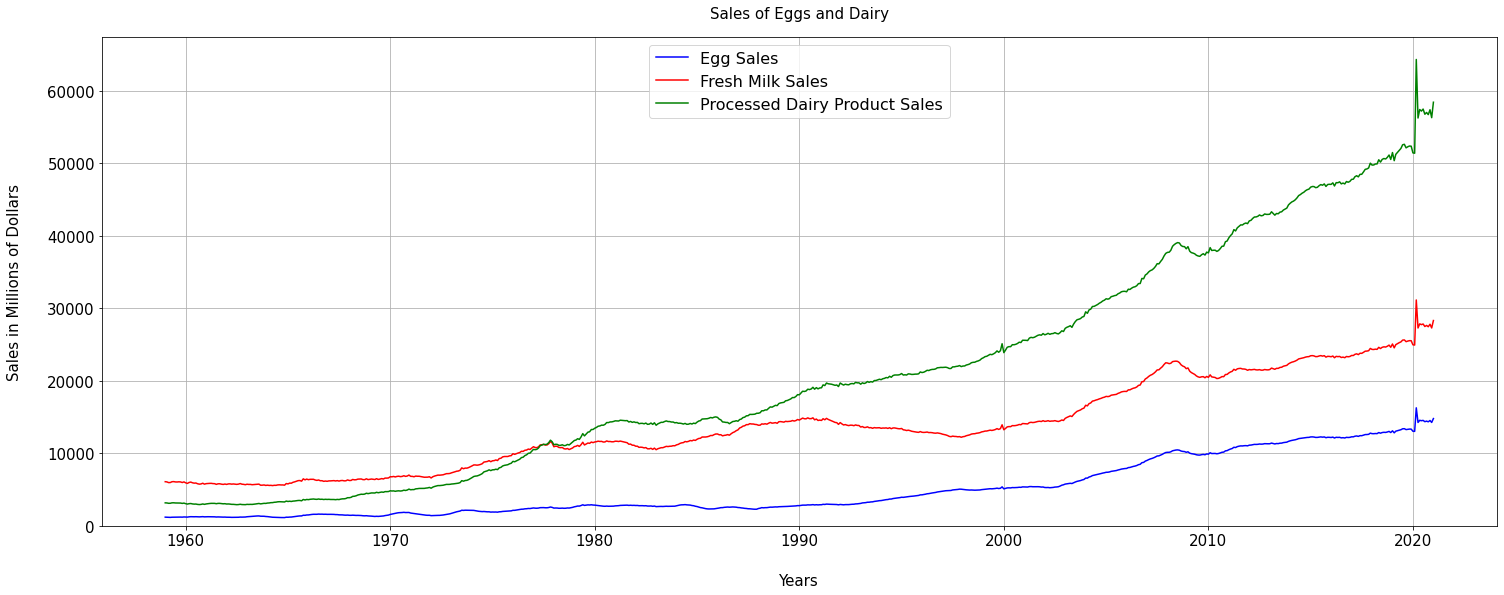

In [98]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(25, 9) )

plt.plot(EggFilter['Month'], EggFilter['Millions of Dollars'], c = 'blue', label = 'Egg Sales');
plt.plot(MilkFilter['Month'], MilkFilter['Millions of Dollars'], c = 'red', label = 'Fresh Milk Sales');
plt.plot(ProcessedDairyFilter['Month'], ProcessedDairyFilter['Millions of Dollars'], c = 'green', label = 'Processed Dairy Product Sales');

plt.grid()
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Sales of Eggs and Dairy', fontsize = 15, y= 1.025)
plt.xlabel('Years', fontsize = 15, labelpad = 25)
plt.ylabel('Sales in Millions of Dollars', fontsize = 15, labelpad = 25)
plt.legend(loc="upper center", fontsize = 16)
plt.ylim(bottom=0)

### Filter by Cereals and Bakery Products

In [99]:
Cereal = df['Category'] == 'Cereals and bakery products'

Cereal = df.loc[Cereal,: ]

Cereal = Cereal.sort_values(by="Month")

Cereal

,Category,Subcategory,Month,Millions of Dollars
4416,Cereals and bakery products,Cereals,1959-01-01,1567
4212,Cereals and bakery products,Bakery products,1959-01-01,6146
4417,Cereals and bakery products,Cereals,1959-02-01,1543
4213,Cereals and bakery products,Bakery products,1959-02-01,6100
4418,Cereals and bakery products,Cereals,1959-03-01,1511
...,...,...,...,...
14841,Cereals and bakery products,Bakery products,2020-11-01,103301
14860,Cereals and bakery products,Cereals,2020-12-01,59429
14861,Cereals and bakery products,Bakery products,2020-12-01,101530
14880,Cereals and bakery products,Cereals,2021-01-01,61675


In [100]:
Cereal.value_counts('Subcategory')

Subcategory
Bakery products    745
Cereals            745
dtype: int64

In [185]:
Cereal1 = Cereal.groupby(['Month'], as_index = False)[['Millions of Dollars']].sum()

Cereal1

,Month,Millions of Dollars
0,1959-01-01,7713
1,1959-02-01,7643
2,1959-03-01,7511
3,1959-04-01,7515
4,1959-05-01,7657
...,...,...
740,2020-09-01,163129
741,2020-10-01,162025
742,2020-11-01,163896
743,2020-12-01,160959


#### Subfilters of Cereals and Bakery Products

In [101]:
BakeryFilter = df['Subcategory'] == 'Bakery products'

BakeryFilter = df.loc[BakeryFilter,: ]

BakeryFilter = BakeryFilter.sort_values(by="Month")

BakeryFilter

,Category,Subcategory,Month,Millions of Dollars
4212,Cereals and bakery products,Bakery products,1959-01-01,6146
4213,Cereals and bakery products,Bakery products,1959-02-01,6100
4214,Cereals and bakery products,Bakery products,1959-03-01,6000
4215,Cereals and bakery products,Bakery products,1959-04-01,6005
4216,Cereals and bakery products,Bakery products,1959-05-01,6117
...,...,...,...,...
14801,Cereals and bakery products,Bakery products,2020-09-01,102997
14821,Cereals and bakery products,Bakery products,2020-10-01,102275
14841,Cereals and bakery products,Bakery products,2020-11-01,103301
14861,Cereals and bakery products,Bakery products,2020-12-01,101530


In [102]:
CerealFilter = df['Subcategory'] == 'Cereals'

CerealFilter = df.loc[CerealFilter,: ]

CerealFilter = CerealFilter.sort_values(by="Month")

CerealFilter

,Category,Subcategory,Month,Millions of Dollars
4416,Cereals and bakery products,Cereals,1959-01-01,1567
4417,Cereals and bakery products,Cereals,1959-02-01,1543
4418,Cereals and bakery products,Cereals,1959-03-01,1511
4419,Cereals and bakery products,Cereals,1959-04-01,1510
4420,Cereals and bakery products,Cereals,1959-05-01,1540
...,...,...,...,...
14800,Cereals and bakery products,Cereals,2020-09-01,60132
14820,Cereals and bakery products,Cereals,2020-10-01,59750
14840,Cereals and bakery products,Cereals,2020-11-01,60595
14860,Cereals and bakery products,Cereals,2020-12-01,59429


#### Visualization of Cereals and Bakery Products

(0.0, 121000.0)

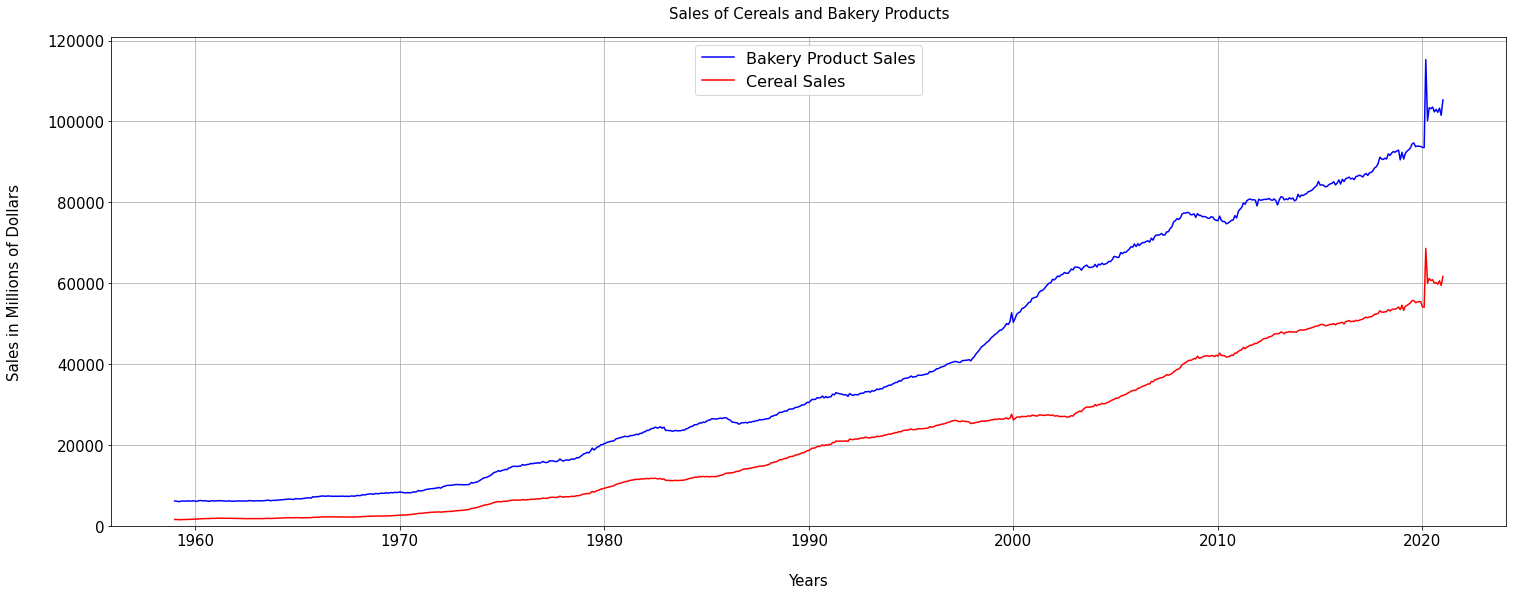

In [103]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(25, 9) )

plt.plot(BakeryFilter['Month'], BakeryFilter['Millions of Dollars'], c = 'blue', label = 'Bakery Product Sales');
plt.plot(CerealFilter['Month'], CerealFilter['Millions of Dollars'], c = 'red', label = 'Cereal Sales');

plt.grid()
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Sales of Cereals and Bakery Products', fontsize = 15, y= 1.025)
plt.xlabel('Years', fontsize = 15, labelpad = 25)
plt.ylabel('Sales in Millions of Dollars', fontsize = 15, labelpad = 25)
plt.legend(loc="upper center", fontsize = 16)
plt.ylim(bottom=0)

### Filter by Fresh fruits and vegetables

In [104]:
Produce = df['Category'] == 'Fresh fruits and vegetables'

Produce = df.loc[Produce,: ]

Produce = Produce.sort_values(by="Month")

Produce

,Category,Subcategory,Month,Millions of Dollars
5232,Fresh fruits and vegetables,Vegetables (fresh),1959-01-01,3399
5028,Fresh fruits and vegetables,Fruit (fresh),1959-01-01,2178
5233,Fresh fruits and vegetables,Vegetables (fresh),1959-02-01,3366
5029,Fresh fruits and vegetables,Fruit (fresh),1959-02-01,2164
5234,Fresh fruits and vegetables,Vegetables (fresh),1959-03-01,3307
...,...,...,...,...
14852,Fresh fruits and vegetables,Vegetables (fresh),2020-11-01,56279
14871,Fresh fruits and vegetables,Fruit (fresh),2020-12-01,45439
14872,Fresh fruits and vegetables,Vegetables (fresh),2020-12-01,55227
14891,Fresh fruits and vegetables,Fruit (fresh),2021-01-01,47148


In [105]:
Produce.value_counts('Subcategory')

Subcategory
Fruit (fresh)         745
Vegetables (fresh)    745
dtype: int64

In [186]:
Produce1 = Produce.groupby(['Month'], as_index = False)[['Millions of Dollars']].sum()

Produce1

,Month,Millions of Dollars
0,1959-01-01,5577
1,1959-02-01,5530
2,1959-03-01,5436
3,1959-04-01,5439
4,1959-05-01,5542
...,...,...
740,2020-09-01,102112
741,2020-10-01,101453
742,2020-11-01,102584
743,2020-12-01,100666


#### Subfilters of Fresh Fruits and Vegetables

In [106]:
FruitFilter = df['Subcategory'] == 'Fruit (fresh)'

FruitFilter = df.loc[FruitFilter,: ]

FruitFilter = FruitFilter.sort_values(by="Month")

FruitFilter

,Category,Subcategory,Month,Millions of Dollars
5028,Fresh fruits and vegetables,Fruit (fresh),1959-01-01,2178
5029,Fresh fruits and vegetables,Fruit (fresh),1959-02-01,2164
5030,Fresh fruits and vegetables,Fruit (fresh),1959-03-01,2129
5031,Fresh fruits and vegetables,Fruit (fresh),1959-04-01,2131
5032,Fresh fruits and vegetables,Fruit (fresh),1959-05-01,2171
...,...,...,...,...
14811,Fresh fruits and vegetables,Fruit (fresh),2020-09-01,46092
14831,Fresh fruits and vegetables,Fruit (fresh),2020-10-01,45794
14851,Fresh fruits and vegetables,Fruit (fresh),2020-11-01,46305
14871,Fresh fruits and vegetables,Fruit (fresh),2020-12-01,45439


In [107]:
VeggieFilter = df['Subcategory'] == 'Vegetables (fresh)'

VeggieFilter = df.loc[VeggieFilter,: ]

VeggieFilter = VeggieFilter.sort_values(by="Month")

VeggieFilter

,Category,Subcategory,Month,Millions of Dollars
5232,Fresh fruits and vegetables,Vegetables (fresh),1959-01-01,3399
5233,Fresh fruits and vegetables,Vegetables (fresh),1959-02-01,3366
5234,Fresh fruits and vegetables,Vegetables (fresh),1959-03-01,3307
5235,Fresh fruits and vegetables,Vegetables (fresh),1959-04-01,3308
5236,Fresh fruits and vegetables,Vegetables (fresh),1959-05-01,3371
...,...,...,...,...
14812,Fresh fruits and vegetables,Vegetables (fresh),2020-09-01,56020
14832,Fresh fruits and vegetables,Vegetables (fresh),2020-10-01,55659
14852,Fresh fruits and vegetables,Vegetables (fresh),2020-11-01,56279
14872,Fresh fruits and vegetables,Vegetables (fresh),2020-12-01,55227


#### Visualization of Fresh Fruits and Vegetables

(0.0, 66218.65)

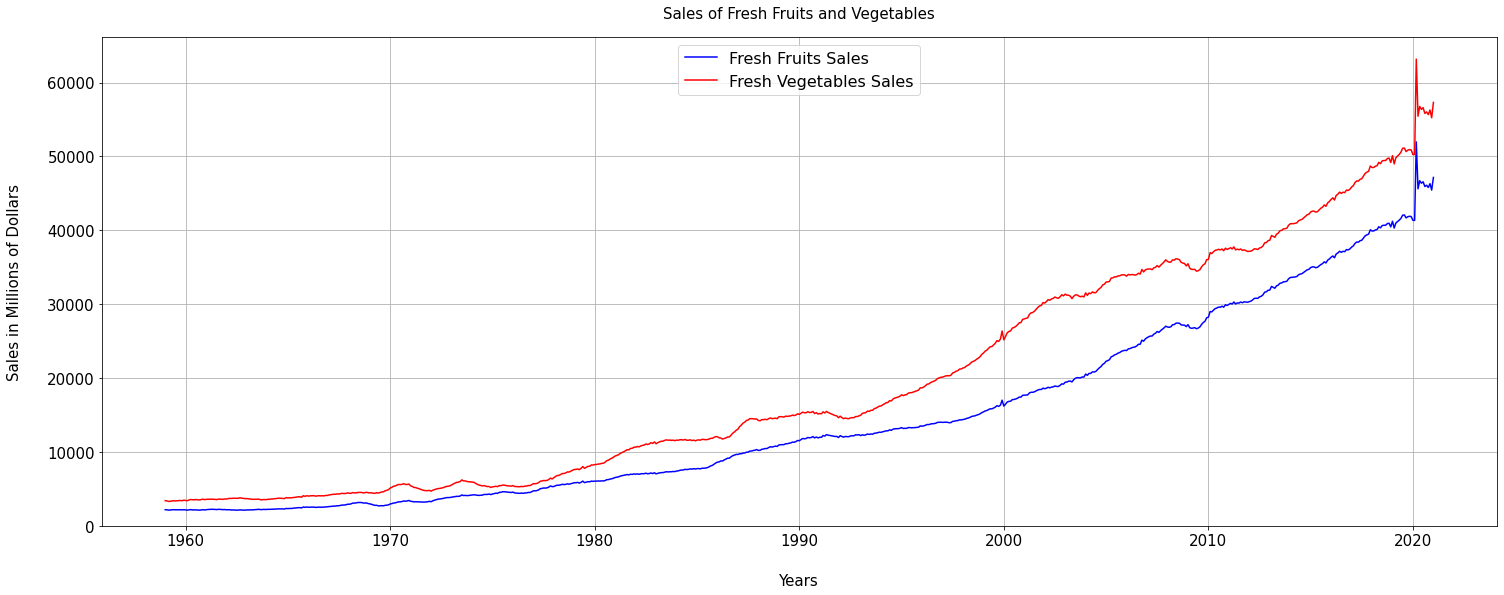

In [108]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(25, 9) )

plt.plot(FruitFilter['Month'], FruitFilter['Millions of Dollars'], c = 'blue', label = 'Fresh Fruits Sales');
plt.plot(VeggieFilter['Month'], VeggieFilter['Millions of Dollars'], c = 'red', label = 'Fresh Vegetables Sales');

plt.grid()
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Sales of Fresh Fruits and Vegetables', fontsize = 15, y= 1.025)
plt.xlabel('Years', fontsize = 15, labelpad = 25)
plt.ylabel('Sales in Millions of Dollars', fontsize = 15, labelpad = 25)
plt.legend(loc="upper center", fontsize = 16)
plt.ylim(bottom=0)

### Filter by Fats and Oils

In [109]:
FatOil = df['Category'] == 'Fats and oils'

FatOil = df.loc[FatOil,: ]

FatOil = FatOil.sort_values(by="Month")

FatOil

,Category,Subcategory,Month,Millions of Dollars
4620,Fats and oils,Fats and oils,1959-01-01,1641
4621,Fats and oils,Fats and oils,1959-02-01,1633
4622,Fats and oils,Fats and oils,1959-03-01,1609
4623,Fats and oils,Fats and oils,1959-04-01,1610
4624,Fats and oils,Fats and oils,1959-05-01,1640
...,...,...,...,...
14810,Fats and oils,Fats and oils,2020-09-01,26058
14830,Fats and oils,Fats and oils,2020-10-01,25892
14850,Fats and oils,Fats and oils,2020-11-01,26258
14870,Fats and oils,Fats and oils,2020-12-01,25753


#### Visualization of Fats and Oils

(0.0, 31139.1)

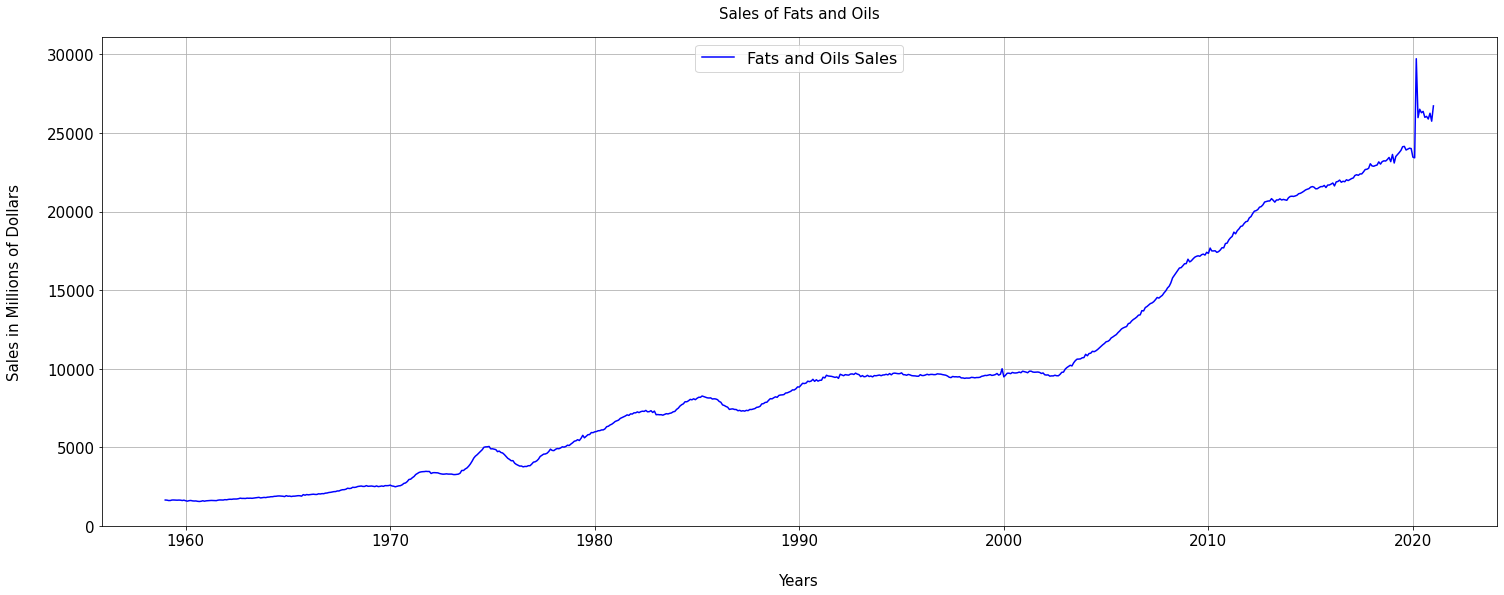

In [111]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(25, 9) )

plt.plot(FatOil['Month'], FatOil['Millions of Dollars'], c = 'blue', label = 'Fats and Oils Sales');

plt.grid()
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Sales of Fats and Oils', fontsize = 15, y= 1.025)
plt.xlabel('Years', fontsize = 15, labelpad = 25)
plt.ylabel('Sales in Millions of Dollars', fontsize = 15, labelpad = 25)
plt.legend(loc="upper center", fontsize = 16)
plt.ylim(bottom=0)

### Filter by Fish and Seafood


In [112]:
Fish = df['Category'] == 'Fish and seafood'

Fish = df.loc[Fish,: ]

Fish = Fish.sort_values(by="Month")

Fish

,Category,Subcategory,Month,Millions of Dollars
4824,Fish and seafood,Fish and seafood,1959-01-01,1013
4825,Fish and seafood,Fish and seafood,1959-02-01,1001
4826,Fish and seafood,Fish and seafood,1959-03-01,981
4827,Fish and seafood,Fish and seafood,1959-04-01,981
4828,Fish and seafood,Fish and seafood,1959-05-01,1000
...,...,...,...,...
14806,Fish and seafood,Fish and seafood,2020-09-01,17450
14826,Fish and seafood,Fish and seafood,2020-10-01,17283
14846,Fish and seafood,Fish and seafood,2020-11-01,17511
14866,Fish and seafood,Fish and seafood,2020-12-01,17271


#### Visualization of Fish and Seafood

(0.0, 20122.5)

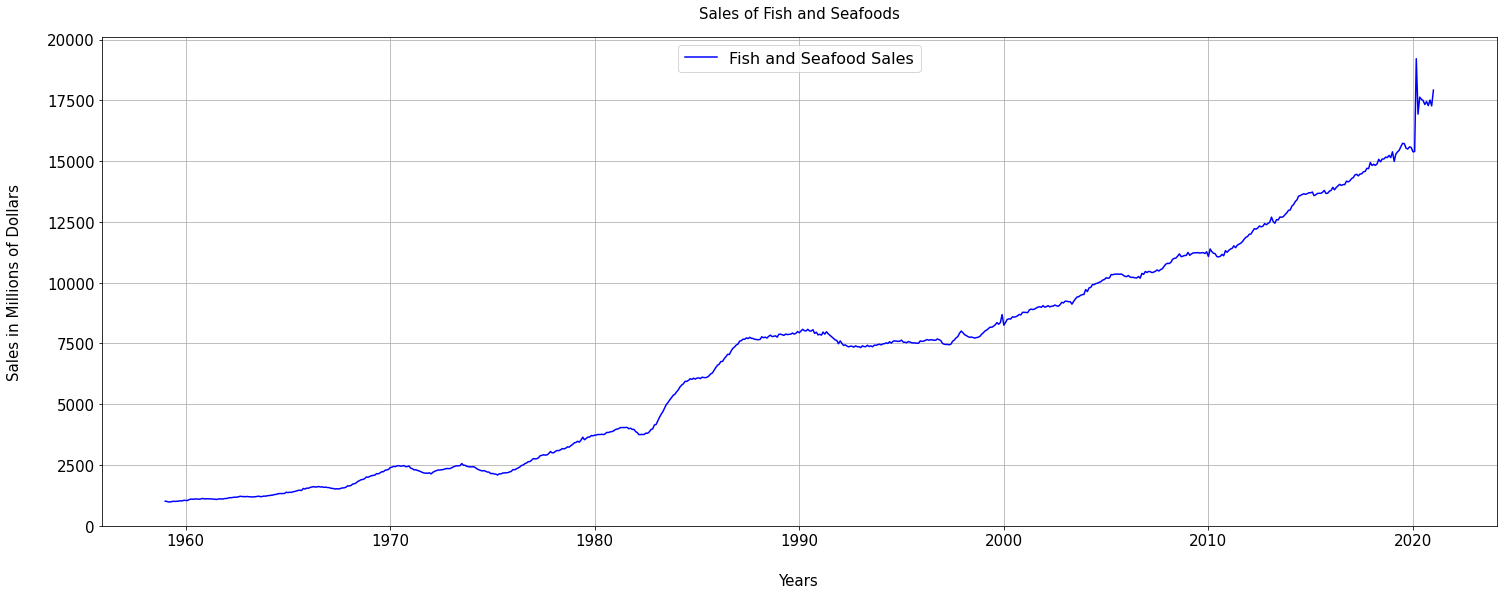

In [114]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(25, 9) )

plt.plot(Fish['Month'], Fish['Millions of Dollars'], c = 'blue', label = 'Fish and Seafood Sales');

plt.grid()
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Sales of Fish and Seafoods', fontsize = 15, y= 1.025)
plt.xlabel('Years', fontsize = 15, labelpad = 25)
plt.ylabel('Sales in Millions of Dollars', fontsize = 15, labelpad = 25)
plt.legend(loc="upper center", fontsize = 16)
plt.ylim(bottom=0)

### Filter by Processed fruits and vegetables

In [115]:
ProcessedProduce = df['Category'] == 'Processed fruits and vegetables'

ProcessedProduce = df.loc[ProcessedProduce,: ]

ProcessedProduce = ProcessedProduce.sort_values(by="Month")

ProcessedProduce

,Category,Subcategory,Month,Millions of Dollars
6864,Processed fruits and vegetables,Processed fruits and vegetables,1959-01-01,2489
6865,Processed fruits and vegetables,Processed fruits and vegetables,1959-02-01,2458
6866,Processed fruits and vegetables,Processed fruits and vegetables,1959-03-01,2409
6867,Processed fruits and vegetables,Processed fruits and vegetables,1959-04-01,2408
6868,Processed fruits and vegetables,Processed fruits and vegetables,1959-05-01,2455
...,...,...,...,...
14813,Processed fruits and vegetables,Processed fruits and vegetables,2020-09-01,34062
14833,Processed fruits and vegetables,Processed fruits and vegetables,2020-10-01,33844
14853,Processed fruits and vegetables,Processed fruits and vegetables,2020-11-01,34284
14873,Processed fruits and vegetables,Processed fruits and vegetables,2020-12-01,33632


#### Visualization of Processed Fruits and Vegetables

(0.0, 40505.15)

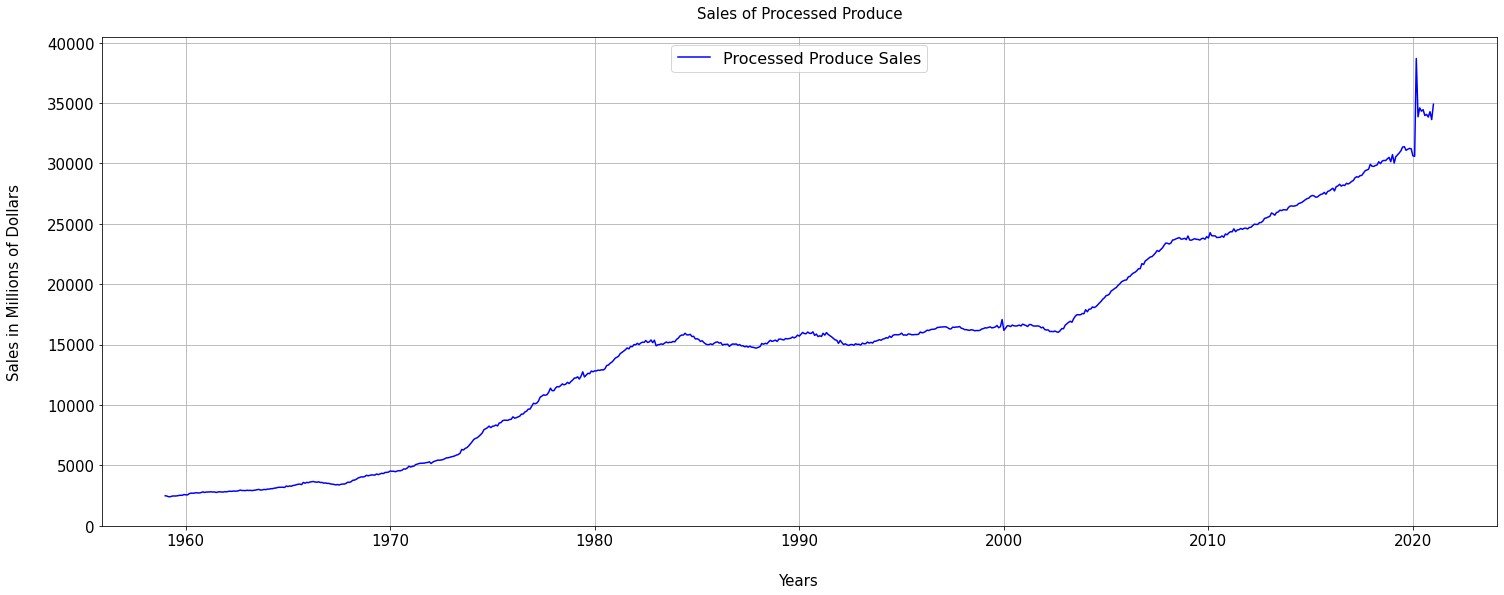

In [116]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(25, 9) )

plt.plot(ProcessedProduce['Month'], ProcessedProduce['Millions of Dollars'], c = 'blue', label = 'Processed Produce Sales');

plt.grid()
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Sales of Processed Produce', fontsize = 15, y= 1.025)
plt.xlabel('Years', fontsize = 15, labelpad = 25)
plt.ylabel('Sales in Millions of Dollars', fontsize = 15, labelpad = 25)
plt.legend(loc="upper center", fontsize = 16)
plt.ylim(bottom=0)

### Filter by Sugar and sweets

In [118]:
Sugar = df['Category'] == 'Sugar and sweets'

Sugar = df.loc[Sugar,: ]

Sugar = Sugar.sort_values(by="Month")

Sugar

,Category,Subcategory,Month,Millions of Dollars
7068,Sugar and sweets,Sugar and sweets,1959-01-01,3252
7069,Sugar and sweets,Sugar and sweets,1959-02-01,3213
7070,Sugar and sweets,Sugar and sweets,1959-03-01,3152
7071,Sugar and sweets,Sugar and sweets,1959-04-01,3151
7072,Sugar and sweets,Sugar and sweets,1959-05-01,3212
...,...,...,...,...
14814,Sugar and sweets,Sugar and sweets,2020-09-01,52085
14834,Sugar and sweets,Sugar and sweets,2020-10-01,51775
14854,Sugar and sweets,Sugar and sweets,2020-11-01,52330
14874,Sugar and sweets,Sugar and sweets,2020-12-01,51848


#### Visualization of Sugar and Sweets

(0.0, 60759.25)

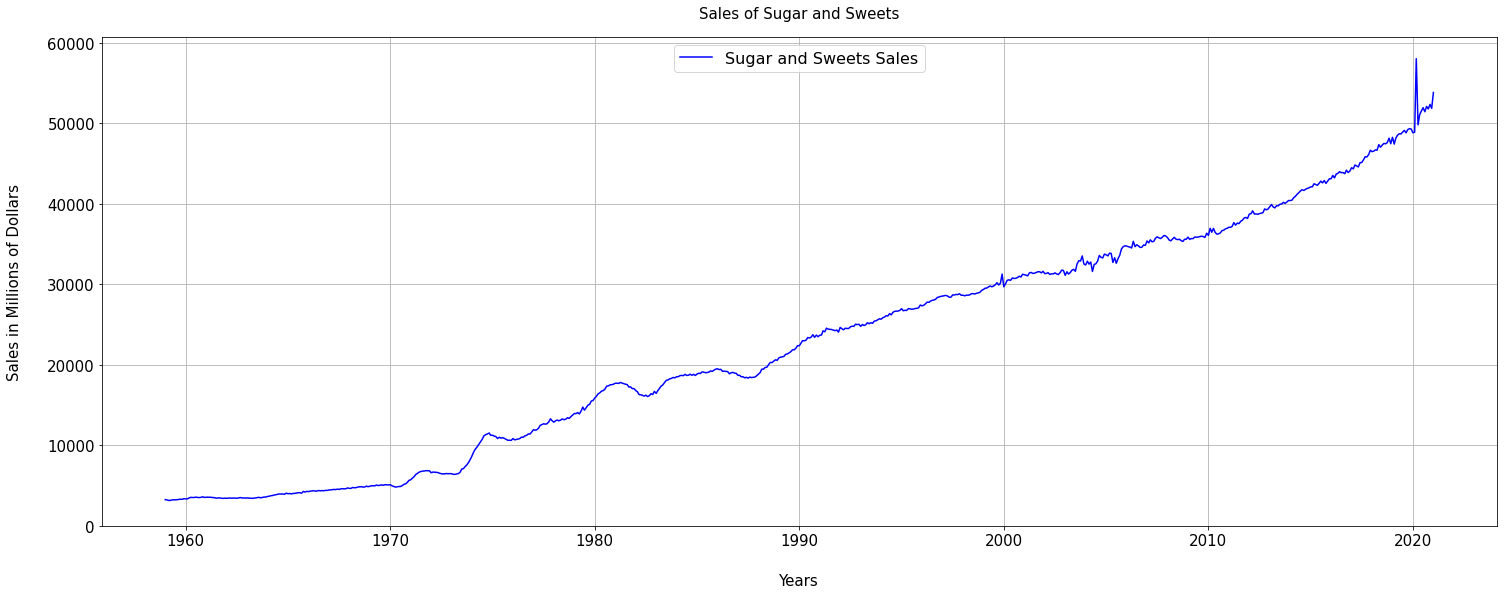

In [119]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(25, 9) )

plt.plot(Sugar['Month'], Sugar['Millions of Dollars'], c = 'blue', label = 'Sugar and Sweets Sales');

plt.grid()
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Sales of Sugar and Sweets', fontsize = 15, y= 1.025)
plt.xlabel('Years', fontsize = 15, labelpad = 25)
plt.ylabel('Sales in Millions of Dollars', fontsize = 15, labelpad = 25)
plt.legend(loc="upper center", fontsize = 16)
plt.ylim(bottom=0)

### Filter by Coffee, tea, and other beverage materials

In [120]:
CoffeeBeverage = df['Category'] == 'Coffee, tea, and other beverage materials'

CoffeeBeverage = df.loc[CoffeeBeverage,: ]

CoffeeBeverage = CoffeeBeverage.sort_values(by="Month")

CoffeeBeverage

,Category,Subcategory,Month,Millions of Dollars
7272,"Coffee, tea, and other beverage materials","Coffee, tea, and other beverage materials",1959-01-01,784
7273,"Coffee, tea, and other beverage materials","Coffee, tea, and other beverage materials",1959-02-01,776
7274,"Coffee, tea, and other beverage materials","Coffee, tea, and other beverage materials",1959-03-01,762
7275,"Coffee, tea, and other beverage materials","Coffee, tea, and other beverage materials",1959-04-01,763
7276,"Coffee, tea, and other beverage materials","Coffee, tea, and other beverage materials",1959-05-01,777
...,...,...,...,...
14815,"Coffee, tea, and other beverage materials","Coffee, tea, and other beverage materials",2020-09-01,18314
14835,"Coffee, tea, and other beverage materials","Coffee, tea, and other beverage materials",2020-10-01,18235
14855,"Coffee, tea, and other beverage materials","Coffee, tea, and other beverage materials",2020-11-01,18434
14875,"Coffee, tea, and other beverage materials","Coffee, tea, and other beverage materials",2020-12-01,18075


#### Visualization of Coffee, Tea, and Other Beverages

(0.0, 21661.2)

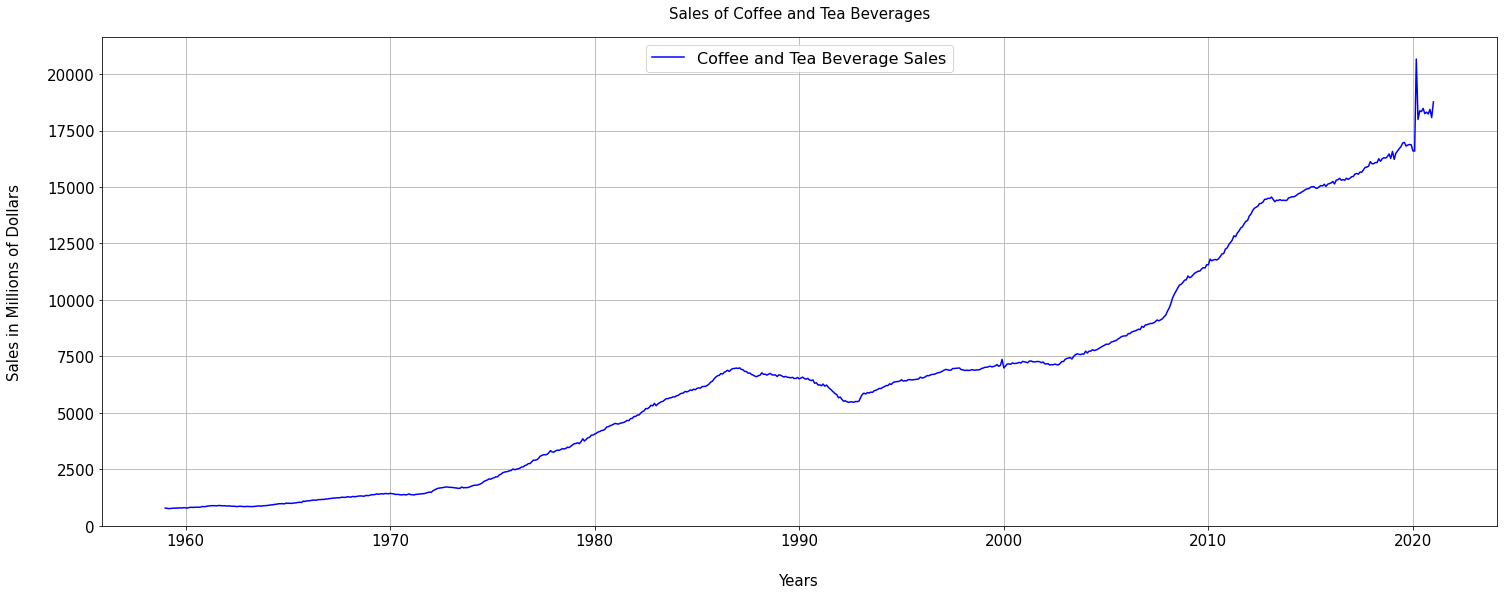

In [121]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(25, 9) )

plt.plot(CoffeeBeverage['Month'], CoffeeBeverage['Millions of Dollars'], c = 'blue', label = 'Coffee and Tea Beverage Sales');

plt.grid()
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Sales of Coffee and Tea Beverages', fontsize = 15, y= 1.025)
plt.xlabel('Years', fontsize = 15, labelpad = 25)
plt.ylabel('Sales in Millions of Dollars', fontsize = 15, labelpad = 25)
plt.legend(loc="upper center", fontsize = 16)
plt.ylim(bottom=0)

### Filter by Mineral waters, soft drinks, and vegetable juices

In [122]:
LegitBeverage = df['Category'] == 'Mineral waters, soft drinks, and vegetable juices'

LegitBeverage = df.loc[LegitBeverage,: ]

LegitBeverage = LegitBeverage.sort_values(by="Month")

LegitBeverage

,Category,Subcategory,Month,Millions of Dollars
7476,"Mineral waters, soft drinks, and vegetable juices","Mineral waters, soft drinks, and vegetable juices",1959-01-01,3918
7477,"Mineral waters, soft drinks, and vegetable juices","Mineral waters, soft drinks, and vegetable juices",1959-02-01,3879
7478,"Mineral waters, soft drinks, and vegetable juices","Mineral waters, soft drinks, and vegetable juices",1959-03-01,3811
7479,"Mineral waters, soft drinks, and vegetable juices","Mineral waters, soft drinks, and vegetable juices",1959-04-01,3813
7480,"Mineral waters, soft drinks, and vegetable juices","Mineral waters, soft drinks, and vegetable juices",1959-05-01,3888
...,...,...,...,...
14816,"Mineral waters, soft drinks, and vegetable juices","Mineral waters, soft drinks, and vegetable juices",2020-09-01,91295
14836,"Mineral waters, soft drinks, and vegetable juices","Mineral waters, soft drinks, and vegetable juices",2020-10-01,91447
14856,"Mineral waters, soft drinks, and vegetable juices","Mineral waters, soft drinks, and vegetable juices",2020-11-01,91576
14876,"Mineral waters, soft drinks, and vegetable juices","Mineral waters, soft drinks, and vegetable juices",2020-12-01,89724


#### Visualization by Mineral waters, soft drinks, and vegetable juices

(0.0, 104418.85)

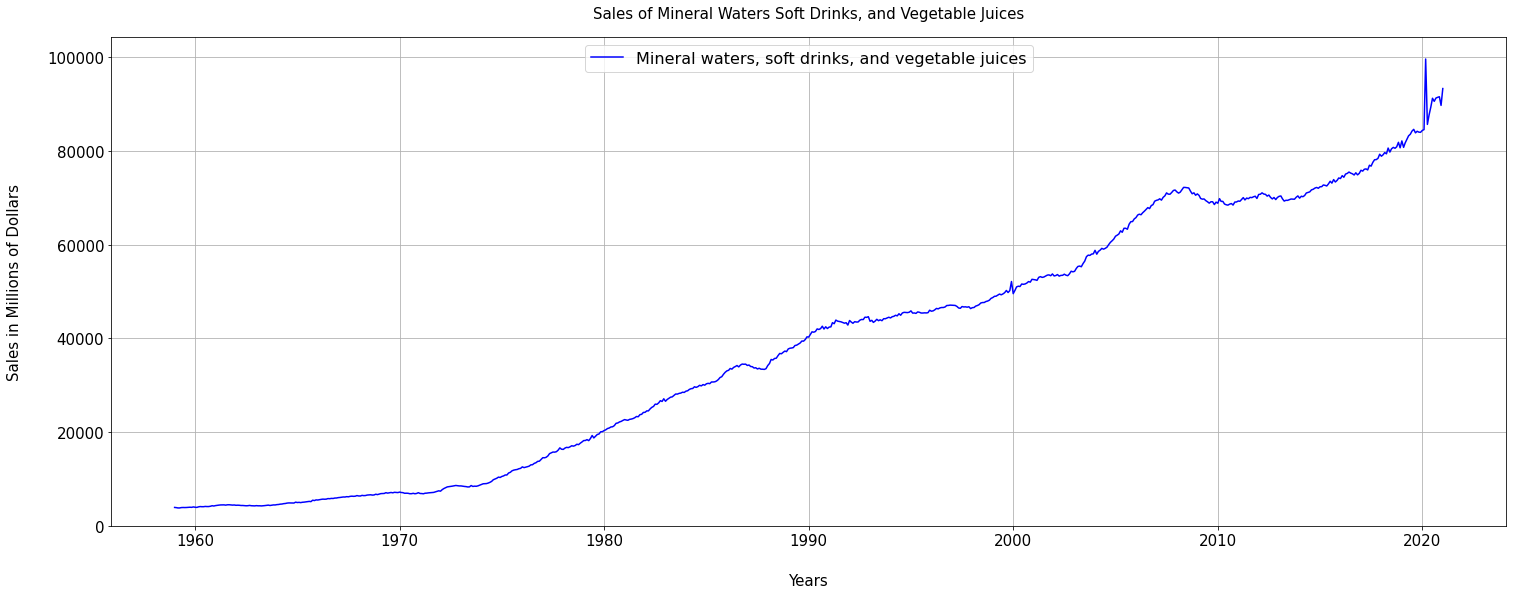

In [123]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(25, 9) )

plt.plot(LegitBeverage['Month'], LegitBeverage['Millions of Dollars'], c = 'blue', label = 'Mineral waters, soft drinks, and vegetable juices');

plt.grid()
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Sales of Mineral Waters Soft Drinks, and Vegetable Juices', fontsize = 15, y= 1.025)
plt.xlabel('Years', fontsize = 15, labelpad = 25)
plt.ylabel('Sales in Millions of Dollars', fontsize = 15, labelpad = 25)
plt.legend(loc="upper center", fontsize = 16)
plt.ylim(bottom=0)

### Visualization by General Category

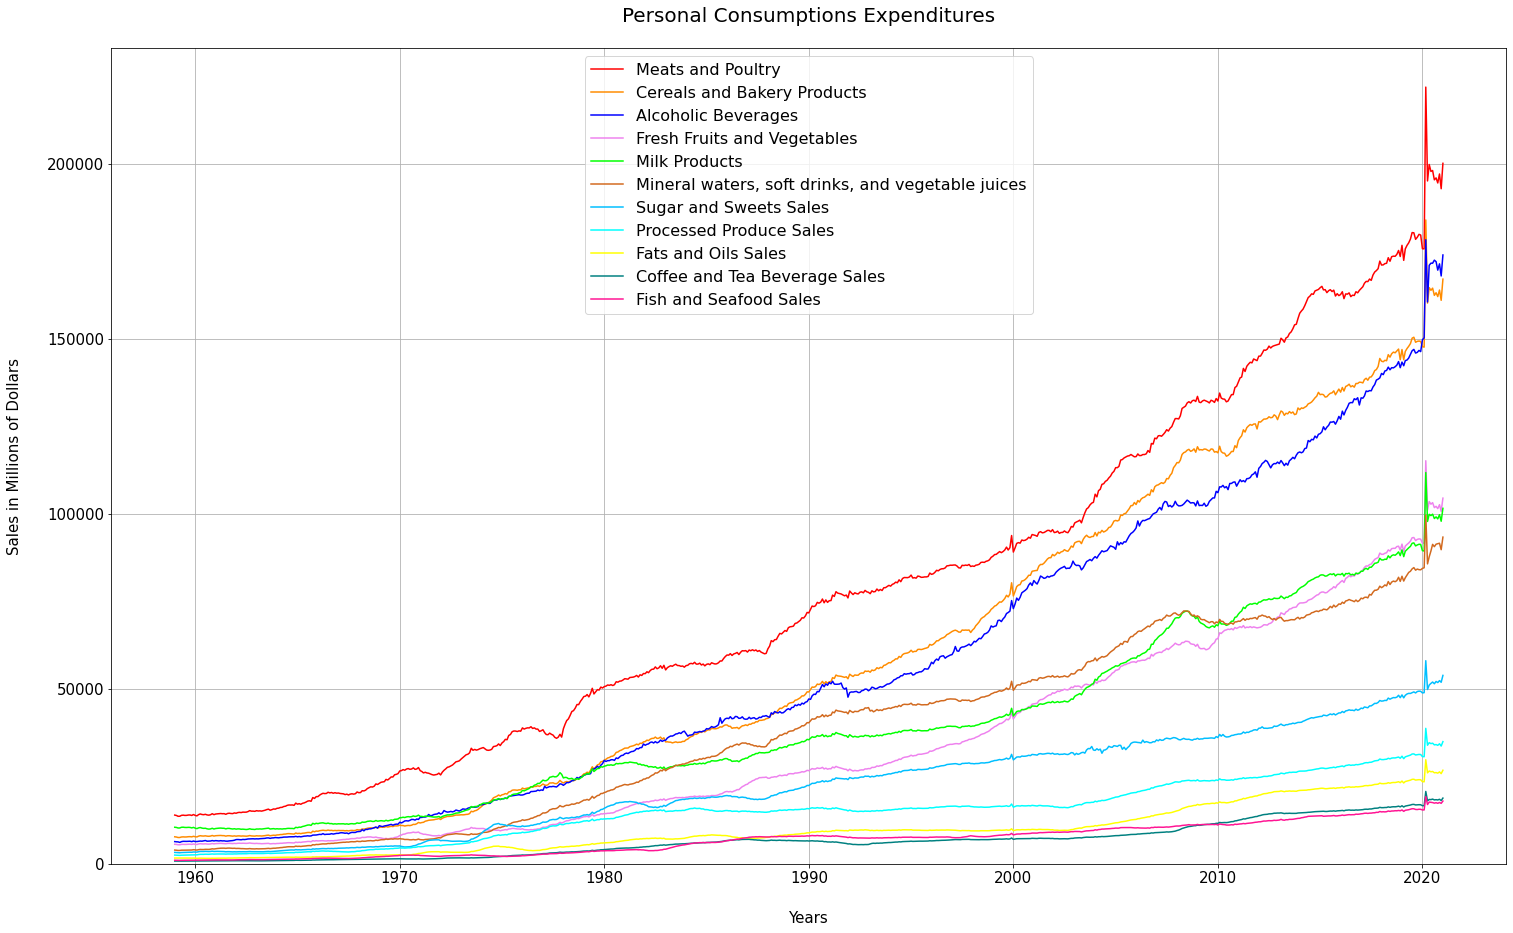

In [193]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(25, 15));

plt.plot(MP1['Month'], MP1['Millions of Dollars'], c = 'red', label = 'Meats and Poultry');
plt.plot(Cereal1['Month'], Cereal1['Millions of Dollars'], c = 'darkorange', label = 'Cereals and Bakery Products');
plt.plot(AB1['Month'], AB1['Millions of Dollars'], c = 'blue', label = 'Alcoholic Beverages');
plt.plot(Produce1['Month'], Produce1['Millions of Dollars'], c = 'violet', label = 'Fresh Fruits and Vegetables');
plt.plot(Dairy1['Month'], Dairy1['Millions of Dollars'], c = 'lime', label = 'Milk Products');
plt.plot(LegitBeverage['Month'], LegitBeverage['Millions of Dollars'], c = 'chocolate', label = 'Mineral waters, soft drinks, and vegetable juices');
plt.plot(Sugar['Month'], Sugar['Millions of Dollars'], c = 'deepskyblue', label = 'Sugar and Sweets Sales');
plt.plot(ProcessedProduce['Month'], ProcessedProduce['Millions of Dollars'], c = 'cyan', label = 'Processed Produce Sales');
plt.plot(FatOil['Month'], FatOil['Millions of Dollars'], c = 'yellow', label = 'Fats and Oils Sales');
plt.plot(CoffeeBeverage['Month'], CoffeeBeverage['Millions of Dollars'], c = 'teal', label = 'Coffee and Tea Beverage Sales');
plt.plot(Fish['Month'], Fish['Millions of Dollars'], c = 'deeppink', label = 'Fish and Seafood Sales');

plt.grid();
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);
plt.title('Personal Consumptions Expenditures', fontsize = 20, y= 1.025);
plt.xlabel('Years', fontsize = 15, labelpad = 25);
plt.ylabel('Sales in Millions of Dollars', fontsize = 15, labelpad = 25);
plt.legend(loc="upper center", fontsize = 16);
plt.ylim(bottom=0);

plt.savefig('Graph.png', dpi = 600)